<a href="https://colab.research.google.com/github/NREL/BEEAM/blob/flexlab-develop/FMU/flexlab_demo/openstudio/data/weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose
Transforms separate weather data CSV files into a common structure, then merges and appends into a single dataframe to load into a single CSV for creating an EPW file.

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# import libraries
import csv
import os
import pandas as pd

# 1 Setup

In [ ]:
# base dir
dir = r'/content/drive/Shared drives/NREL DC Design Tool/Tasks/7 Validation/7.2 Whole Tool Validation/FLEXLAB/FL_Data'

csv1_path = os.path.join(dir + '/Raw', 'Oct 28 to 30 Suppl Data.csv')
print(csv1_path)

csv2_path = os.path.join(dir, 'data_FL_wthr.csv')
print(csv2_path)

csv3_path = os.path.join(dir + '/Raw', 'wind_pressure_RH for FLEXLAB test.csv')
print(csv3_path)

/content/drive/Shared drives/NREL DC Design Tool/Tasks/7 Validation/7.2 Whole Tool Validation/FLEXLAB/FL_Data/Raw/Oct 28 to 30 Suppl Data.csv
/content/drive/Shared drives/NREL DC Design Tool/Tasks/7 Validation/7.2 Whole Tool Validation/FLEXLAB/FL_Data/data_FL_wthr.csv
/content/drive/Shared drives/NREL DC Design Tool/Tasks/7 Validation/7.2 Whole Tool Validation/FLEXLAB/FL_Data/Raw/wind_pressure_RH for FLEXLAB test.csv


# 2 Extract

In [ ]:
df1 = pd.read_csv(csv1_path)
df1

,datetime,PIR,GHI,DHI,DNI,Outside Air Temp South,Wind Speed,RH,Wind Direction,Outside Air Pressure,Outside Air Temp North
0,10/28/20 0:00,-101.925585,-0.180426,-0.540694,-0.358975,19.222634,0.422629,21.972731,164.194844,992.890172,18.853617
1,10/28/20 0:01,-103.187468,-0.224151,-0.454650,-0.352314,19.156112,0.346330,21.616017,198.301021,992.916971,18.901820
2,10/28/20 0:02,-104.422143,0.162863,-0.466202,-0.326140,19.215984,0.404377,21.350800,119.376562,993.051218,18.904985
3,10/28/20 0:03,-104.715473,0.437002,-0.197841,-0.257289,19.314527,0.666576,21.118889,194.762188,992.940122,19.007366
4,10/28/20 0:04,-107.652237,0.895252,1.026512,0.308577,19.405988,0.441869,21.196625,182.444326,992.912344,19.018787
...,...,...,...,...,...,...,...,...,...,...,...
4313,10/30/20 23:53,-93.906204,0.105627,0.072686,-0.044416,16.399223,1.257576,44.150578,114.607859,992.262375,15.443056
4314,10/30/20 23:54,-93.118357,0.132403,-0.163905,-0.074535,16.277919,0.787335,42.517732,113.734963,992.248892,15.670467
4315,10/30/20 23:55,-92.147341,-0.213588,-0.075213,-0.228230,16.474777,1.401049,43.020592,129.119069,992.379735,15.514459
4316,10/30/20 23:56,-93.067022,-0.113611,0.104577,0.066730,16.527013,1.488001,42.335213,122.615981,992.298671,15.387081


In [ ]:
df2 = pd.read_csv(csv2_path)
df2

,time,outside_air_temp,Global_horizontal_irradiance,Diffuse_horizontal_irradiance,Direct_normal_irradiance,Passive_infrared_radiation
0,2020-10-30 00:00:00,14.862983,0.946592,0.495205,0.538844,-96.743179
1,2020-10-30 00:01:00,15.009438,0.749831,0.557902,0.488828,-96.634892
2,2020-10-30 00:02:00,14.775107,0.655872,0.376668,0.501300,-96.416789
3,2020-10-30 00:03:00,14.901403,0.405805,0.289180,0.602604,-96.225800
4,2020-10-30 00:04:00,15.025593,0.329287,0.376187,0.694405,-96.176670
...,...,...,...,...,...,...
46075,2020-11-30 23:55:00,11.122334,0.791836,0.932525,0.541432,-85.759752
46076,2020-11-30 23:56:00,11.087267,0.812225,0.555375,0.369368,-85.820015
46077,2020-11-30 23:57:00,11.045338,0.664101,0.487743,0.421590,-85.588567
46078,2020-11-30 23:58:00,10.958671,0.541770,0.463194,0.419214,-85.662174


In [ ]:
df3 = pd.read_csv(csv3_path)
df3

,datetime,wind direction (deg),outside air pressure (millibar),wind speed (m/s),rel humidity
0,10/30/2020 0:00,246.931207,992.312022,0.838030,71.193035
1,10/30/2020 0:01,14.131599,992.170037,0.664398,71.848036
2,10/30/2020 0:02,53.859019,992.267870,0.529425,71.557501
3,10/30/2020 0:03,115.679444,992.200329,0.561332,69.223787
4,10/30/2020 0:04,99.858368,992.280208,0.364482,67.653827
...,...,...,...,...,...
43443,11/30/2020 23:53,324.907636,999.639623,0.909291,58.923709
43444,11/30/2020 23:54,178.293154,999.665796,0.548261,58.741194
43445,11/30/2020 23:55,234.243712,999.650778,0.355651,59.481538
43446,11/30/2020 23:56,46.653497,999.705061,0.347750,59.416678


# 3 Transform

## 3.1 DataFrame 1

In [ ]:
# slice dataframe by excluding overlapping rows for Oct 30
df1['datetime'] = pd.to_datetime(df1['datetime'])
df1.set_index('datetime', inplace=True)
df1 = df1['2020-10-28 00:00:00':'2020-10-29 23:59:00']

# reset index for merging
df1.reset_index(inplace=True)

# show dataframe
df1

,datetime,PIR,GHI,DHI,DNI,Outside Air Temp South,Wind Speed,RH,Wind Direction,Outside Air Pressure,Outside Air Temp North
0,2020-10-28 00:00:00,-101.925585,-0.180426,-0.540694,-0.358975,19.222634,0.422629,21.972731,164.194844,992.890172,18.853617
1,2020-10-28 00:01:00,-103.187468,-0.224151,-0.454650,-0.352314,19.156112,0.346330,21.616017,198.301021,992.916971,18.901820
2,2020-10-28 00:02:00,-104.422143,0.162863,-0.466202,-0.326140,19.215984,0.404377,21.350800,119.376562,993.051218,18.904985
3,2020-10-28 00:03:00,-104.715473,0.437002,-0.197841,-0.257289,19.314527,0.666576,21.118889,194.762188,992.940122,19.007366
4,2020-10-28 00:04:00,-107.652237,0.895252,1.026512,0.308577,19.405988,0.441869,21.196625,182.444326,992.912344,19.018787
...,...,...,...,...,...,...,...,...,...,...,...
2875,2020-10-29 23:55:00,-95.692865,2.147672,2.137744,0.906642,13.682256,1.032547,63.484688,334.945176,992.165177,13.238049
2876,2020-10-29 23:56:00,-95.369870,2.028535,1.924860,0.876438,13.512560,1.030407,67.247660,333.891365,992.216933,13.194352
2877,2020-10-29 23:57:00,-95.267530,2.041308,1.757946,0.930441,13.565333,0.886155,68.515239,317.899238,992.255648,13.184758
2878,2020-10-29 23:58:00,-94.978025,1.679596,1.574305,0.918648,13.502492,0.734610,68.700649,317.287330,992.327400,13.121994


In [ ]:
# add column for air temp
dbt_series = (df1['Outside Air Temp South'] + df1['Outside Air Temp North']) / 2
df1.insert(1, 'Dry Bulb Temperature', dbt_series)
df1

,datetime,Dry Bulb Temperature,PIR,GHI,DHI,DNI,Outside Air Temp South,Wind Speed,RH,Wind Direction,Outside Air Pressure,Outside Air Temp North
0,2020-10-28 00:00:00,19.038126,-101.925585,-0.180426,-0.540694,-0.358975,19.222634,0.422629,21.972731,164.194844,992.890172,18.853617
1,2020-10-28 00:01:00,19.028966,-103.187468,-0.224151,-0.454650,-0.352314,19.156112,0.346330,21.616017,198.301021,992.916971,18.901820
2,2020-10-28 00:02:00,19.060485,-104.422143,0.162863,-0.466202,-0.326140,19.215984,0.404377,21.350800,119.376562,993.051218,18.904985
3,2020-10-28 00:03:00,19.160946,-104.715473,0.437002,-0.197841,-0.257289,19.314527,0.666576,21.118889,194.762188,992.940122,19.007366
4,2020-10-28 00:04:00,19.212387,-107.652237,0.895252,1.026512,0.308577,19.405988,0.441869,21.196625,182.444326,992.912344,19.018787
...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2020-10-29 23:55:00,13.460152,-95.692865,2.147672,2.137744,0.906642,13.682256,1.032547,63.484688,334.945176,992.165177,13.238049
2876,2020-10-29 23:56:00,13.353456,-95.369870,2.028535,1.924860,0.876438,13.512560,1.030407,67.247660,333.891365,992.216933,13.194352
2877,2020-10-29 23:57:00,13.375045,-95.267530,2.041308,1.757946,0.930441,13.565333,0.886155,68.515239,317.899238,992.255648,13.184758
2878,2020-10-29 23:58:00,13.312243,-94.978025,1.679596,1.574305,0.918648,13.502492,0.734610,68.700649,317.287330,992.327400,13.121994


## 3.2 Drop Columns

In [ ]:
# drop columns
df1_cols_to_drop = ['PIR',
                    'Outside Air Temp South',
                    'Outside Air Temp North']

df2_cols_to_drop = ['Passive_infrared_radiation']

# drop columns
df1.drop(labels=df1_cols_to_drop, axis=1, inplace=True)
df2.drop(labels=df2_cols_to_drop, axis=1, inplace=True)

# show dataframe
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,datetime,Dry Bulb Temperature,GHI,DHI,DNI,Wind Speed,RH,Wind Direction,Outside Air Pressure
0,2020-10-28 00:00:00,19.038126,-0.180426,-0.540694,-0.358975,0.422629,21.972731,164.194844,992.890172
1,2020-10-28 00:01:00,19.028966,-0.224151,-0.454650,-0.352314,0.346330,21.616017,198.301021,992.916971
2,2020-10-28 00:02:00,19.060485,0.162863,-0.466202,-0.326140,0.404377,21.350800,119.376562,993.051218
3,2020-10-28 00:03:00,19.160946,0.437002,-0.197841,-0.257289,0.666576,21.118889,194.762188,992.940122
4,2020-10-28 00:04:00,19.212387,0.895252,1.026512,0.308577,0.441869,21.196625,182.444326,992.912344
...,...,...,...,...,...,...,...,...,...
2875,2020-10-29 23:55:00,13.460152,2.147672,2.137744,0.906642,1.032547,63.484688,334.945176,992.165177
2876,2020-10-29 23:56:00,13.353456,2.028535,1.924860,0.876438,1.030407,67.247660,333.891365,992.216933
2877,2020-10-29 23:57:00,13.375045,2.041308,1.757946,0.930441,0.886155,68.515239,317.899238,992.255648
2878,2020-10-29 23:58:00,13.312243,1.679596,1.574305,0.918648,0.734610,68.700649,317.287330,992.327400


In [ ]:
df2

,time,outside_air_temp,Global_horizontal_irradiance,Diffuse_horizontal_irradiance,Direct_normal_irradiance
0,2020-10-30 00:00:00,14.862983,0.946592,0.495205,0.538844
1,2020-10-30 00:01:00,15.009438,0.749831,0.557902,0.488828
2,2020-10-30 00:02:00,14.775107,0.655872,0.376668,0.501300
3,2020-10-30 00:03:00,14.901403,0.405805,0.289180,0.602604
4,2020-10-30 00:04:00,15.025593,0.329287,0.376187,0.694405
...,...,...,...,...,...
46075,2020-11-30 23:55:00,11.122334,0.791836,0.932525,0.541432
46076,2020-11-30 23:56:00,11.087267,0.812225,0.555375,0.369368
46077,2020-11-30 23:57:00,11.045338,0.664101,0.487743,0.421590
46078,2020-11-30 23:58:00,10.958671,0.541770,0.463194,0.419214


## 3.3 Rename Columns

In [ ]:
# print columns
for col in df1.columns:
    print(col)
print('')

for col in df2.columns:
    print(col)
print('')

for col in df3.columns:
    print(col)

datetime
Dry Bulb Temperature
GHI
DHI
DNI
Wind Speed
RH
Wind Direction
Outside Air Pressure

time
outside_air_temp
Global_horizontal_irradiance
Diffuse_horizontal_irradiance
Direct_normal_irradiance

datetime
wind direction (deg)
outside air pressure (millibar)
wind speed (m/s)
rel humidity


In [ ]:
# rename columns according to EPW data fields
# https://bigladdersoftware.com/epx/docs/9-4/auxiliary-programs/energyplus-weather-file-epw-data-dictionary.html#data-field-descriptions

df1_col_dict = {'GHI':'Global Horizontal Radiation',
                'DHI':'Diffuse Horizontal Radiation',
                'DNI':'Direct Normal Radiation',
                'RH':'Relative Humidity',
                'Outside Air Pressure':'Atmospheric Station Pressure'}

df2_col_dict = {'time':'datetime',
                'outside_air_temp':'Dry Bulb Temperature',
                'Global_horizontal_irradiance':'Global Horizontal Radiation',
                'Diffuse_horizontal_irradiance':'Diffuse Horizontal Radiation',
                'Direct_normal_irradiance':'Direct Normal Radiation'}

df3_col_dict = {'wind direction (deg)':'Wind Direction',
                'outside air pressure (millibar)':'Atmospheric Station Pressure',
                'wind speed (m/s)':'Wind Speed',
                'rel humidity':'Relative Humidity'}

df1.rename(columns=df1_col_dict, inplace=True)
df2.rename(columns=df2_col_dict, inplace=True)
df3.rename(columns=df3_col_dict, inplace=True)

df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,datetime,Dry Bulb Temperature,Global Horizontal Radiation,Diffuse Horizontal Radiation,Direct Normal Radiation,Wind Speed,Relative Humidity,Wind Direction,Atmospheric Station Pressure
0,2020-10-28 00:00:00,19.038126,-0.180426,-0.540694,-0.358975,0.422629,21.972731,164.194844,992.890172
1,2020-10-28 00:01:00,19.028966,-0.224151,-0.454650,-0.352314,0.346330,21.616017,198.301021,992.916971
2,2020-10-28 00:02:00,19.060485,0.162863,-0.466202,-0.326140,0.404377,21.350800,119.376562,993.051218
3,2020-10-28 00:03:00,19.160946,0.437002,-0.197841,-0.257289,0.666576,21.118889,194.762188,992.940122
4,2020-10-28 00:04:00,19.212387,0.895252,1.026512,0.308577,0.441869,21.196625,182.444326,992.912344
...,...,...,...,...,...,...,...,...,...
2875,2020-10-29 23:55:00,13.460152,2.147672,2.137744,0.906642,1.032547,63.484688,334.945176,992.165177
2876,2020-10-29 23:56:00,13.353456,2.028535,1.924860,0.876438,1.030407,67.247660,333.891365,992.216933
2877,2020-10-29 23:57:00,13.375045,2.041308,1.757946,0.930441,0.886155,68.515239,317.899238,992.255648
2878,2020-10-29 23:58:00,13.312243,1.679596,1.574305,0.918648,0.734610,68.700649,317.287330,992.327400


In [ ]:
df2

,datetime,Dry Bulb Temperature,Global Horizontal Radiation,Diffuse Horizontal Radiation,Direct Normal Radiation
0,2020-10-30 00:00:00,14.862983,0.946592,0.495205,0.538844
1,2020-10-30 00:01:00,15.009438,0.749831,0.557902,0.488828
2,2020-10-30 00:02:00,14.775107,0.655872,0.376668,0.501300
3,2020-10-30 00:03:00,14.901403,0.405805,0.289180,0.602604
4,2020-10-30 00:04:00,15.025593,0.329287,0.376187,0.694405
...,...,...,...,...,...
46075,2020-11-30 23:55:00,11.122334,0.791836,0.932525,0.541432
46076,2020-11-30 23:56:00,11.087267,0.812225,0.555375,0.369368
46077,2020-11-30 23:57:00,11.045338,0.664101,0.487743,0.421590
46078,2020-11-30 23:58:00,10.958671,0.541770,0.463194,0.419214


In [ ]:
df3

,datetime,Wind Direction,Atmospheric Station Pressure,Wind Speed,Relative Humidity
0,10/30/2020 0:00,246.931207,992.312022,0.838030,71.193035
1,10/30/2020 0:01,14.131599,992.170037,0.664398,71.848036
2,10/30/2020 0:02,53.859019,992.267870,0.529425,71.557501
3,10/30/2020 0:03,115.679444,992.200329,0.561332,69.223787
4,10/30/2020 0:04,99.858368,992.280208,0.364482,67.653827
...,...,...,...,...,...
43443,11/30/2020 23:53,324.907636,999.639623,0.909291,58.923709
43444,11/30/2020 23:54,178.293154,999.665796,0.548261,58.741194
43445,11/30/2020 23:55,234.243712,999.650778,0.355651,59.481538
43446,11/30/2020 23:56,46.653497,999.705061,0.347750,59.416678


## 3.4 Merge and Append

In [ ]:
# convert datetime to datetime
# df1['datetime'] = pd.to_datetime(df1['datetime'])
df2['datetime'] = pd.to_datetime(df2['datetime'])
df3['datetime'] = pd.to_datetime(df3['datetime'])

In [ ]:
# merge df3 with df2
if df2.shape[0] > df3.shape[0]:
    df23 = pd.merge_ordered(df2, df3, on='datetime')
elif df3.shape[0] > df2.shape[0]:
    df23 = pd.merge_ordered(df3, df2, on='datetime')

df23

,datetime,Dry Bulb Temperature,Global Horizontal Radiation,Diffuse Horizontal Radiation,Direct Normal Radiation,Wind Direction,Atmospheric Station Pressure,Wind Speed,Relative Humidity
0,2020-10-30 00:00:00,14.862983,0.946592,0.495205,0.538844,246.931207,992.312022,0.838030,71.193035
1,2020-10-30 00:01:00,15.009438,0.749831,0.557902,0.488828,14.131599,992.170037,0.664398,71.848036
2,2020-10-30 00:02:00,14.775107,0.655872,0.376668,0.501300,53.859019,992.267870,0.529425,71.557501
3,2020-10-30 00:03:00,14.901403,0.405805,0.289180,0.602604,115.679444,992.200329,0.561332,69.223787
4,2020-10-30 00:04:00,15.025593,0.329287,0.376187,0.694405,99.858368,992.280208,0.364482,67.653827
...,...,...,...,...,...,...,...,...,...
46075,2020-11-30 23:55:00,11.122334,0.791836,0.932525,0.541432,234.243712,999.650778,0.355651,59.481538
46076,2020-11-30 23:56:00,11.087267,0.812225,0.555375,0.369368,46.653497,999.705061,0.347750,59.416678
46077,2020-11-30 23:57:00,11.045338,0.664101,0.487743,0.421590,62.926328,999.689114,0.337567,59.670479
46078,2020-11-30 23:58:00,10.958671,0.541770,0.463194,0.419214,NaN,NaN,NaN,NaN


In [ ]:
# set indices for appending
df1.set_index('datetime', inplace=True)
df23.set_index('datetime', inplace=True)

In [ ]:
# append to df1
df123 = df1.append(df23)
df123

,Dry Bulb Temperature,Global Horizontal Radiation,Diffuse Horizontal Radiation,Direct Normal Radiation,Wind Speed,Relative Humidity,Wind Direction,Atmospheric Station Pressure
datetime,,,,,,,,
2020-10-28 00:00:00,19.038126,-0.180426,-0.540694,-0.358975,0.422629,21.972731,164.194844,992.890172
2020-10-28 00:01:00,19.028966,-0.224151,-0.454650,-0.352314,0.346330,21.616017,198.301021,992.916971
2020-10-28 00:02:00,19.060485,0.162863,-0.466202,-0.326140,0.404377,21.350800,119.376562,993.051218
2020-10-28 00:03:00,19.160946,0.437002,-0.197841,-0.257289,0.666576,21.118889,194.762188,992.940122
2020-10-28 00:04:00,19.212387,0.895252,1.026512,0.308577,0.441869,21.196625,182.444326,992.912344
...,...,...,...,...,...,...,...,...
2020-11-30 23:55:00,11.122334,0.791836,0.932525,0.541432,0.355651,59.481538,234.243712,999.650778
2020-11-30 23:56:00,11.087267,0.812225,0.555375,0.369368,0.347750,59.416678,46.653497,999.705061
2020-11-30 23:57:00,11.045338,0.664101,0.487743,0.421590,0.337567,59.670479,62.926328,999.689114


# 4 Load

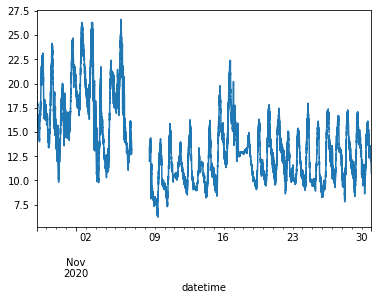

In [ ]:
df123['Dry Bulb Temperature'].plot()

In [ ]:
df123.to_csv(os.path.join(dir, 'weather_data_combined.csv'))